In [119]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statistics
import heapq

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm
from sklearn.metrics import hamming_loss
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy.spatial import distance

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score, roc_curve,auc
from sklearn.calibration import CalibratedClassifierCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.manifold import SpectralEmbedding

1.Supervised, Semi-Supervised, and Unsupervised Learning

a)Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data inhttps://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, whichhas IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data hastwo output classes. Use the first 20% of the positive and negative classes in thefile as the test set and the rest as the training set.

In [10]:
data=pd.read_csv("C:\\Users\\D\\Downloads\\wdbc.data",sep=",",header=None)
data=data.replace('M',0)
data=data.replace('B',1)
data.drop([0],axis=1,inplace=True)
data.sort_values([1],inplace=True)
penalties = list(10**exp for exp in range(-3,6))


In [121]:
def print_conf_mat(real_val,pred_val):
    mat=confusion_matrix(real_val,(pred_val>0.5).astype(int))
    tn=mat[0][0]
    fp=mat[0][1]
    fn=mat[1][0]
    tp=mat[1][1]
    print("True negative",tn)
    print("False positive",fp)
    print("False negative",tn)
    print("True positive",tn)

In [122]:
def build_roc(real_val,prob_val):
    fal_pos_rate,tru_pos_rate,threshold=roc_curve(real_val,prob_val)
    plt.plot(fal_pos_rate, tru_pos_rate, color='orange', label='ROC curve (area = %0.2f)' % auc(fal_pos_rate,tru_pos_rate))
    plt.plot([0, 1], [0, 1], color='blue',  linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [123]:
def calc_avg(train_vals,test_vals):

    train_vals["acc_train"]=np.mean(acc_train)
    train_vals["prec_train"]=np.mean(prec_train)
    train_vals["rec_train"]=np.mean(rec_train)
    train_vals["f1_train"]=np.mean(f1_train)
    train_vals["auc_train"]=np.mean(auc_train)

    test_vals["acc_test"]=np.mean(acc_test)
    test_vals["prec_test"]=np.mean(prec_test)
    test_vals["rec_test"]=np.mean(rec_test)
    test_vals["f1_test"]=np.mean(f1_test)
    test_vals["auc_test"]=np.mean(auc_test)


    print("Average accuracy, precision, recall, F-score, and AUC, for training sets over your M runs: \n",train_vals)
    print("Average accuracy, precision, recall, F-score, and AUC, for test sets over your M runs: \n",test_vals)

(b)Monte-Carlo Simulation: Repeat the following procedures for supervised, un-supervised, and semi-supervised learningM= 30 times, and use randomly se-lected train and test data (make sure you use 20% of both the positve and nega-tive classes as the test set). Then compare theaveragescores (accuracy, precision,recall, F-score, and AUC) that you obtain from each algorithm.

i.Supervised Learning:Train anL1-penalized SVM to classify the data.Use 5 fold cross validation to choose the penalty parameter. Use normalizeddata. Report the average accuracy, precision, recall, F-score, and AUC, forboth training and test sets over yourMruns. Plot the ROC and report theconfusion matrix for training and testing in one of the runs.

1 th experiments results are:
Accuracy Train: 0.621978021978022 Precision Train: 0.621978021978022 Recall Train: 1.0 F-1 Score Train: 0.7669376693766937 AUC Train: []
Accuracy Test: 0.6491228070175439 Precision Test: 0.6491228070175439 Recall Test: 1.0 F-1 Score Test: 0.7872340425531915 AUC Test: []

2 th experiments results are:
Accuracy Train: 0.6329670329670329 Precision Train: 0.6329670329670329 Recall Train: 1.0 F-1 Score Train: 0.775235531628533 AUC Train: [0.5]
Accuracy Test: 0.6052631578947368 Precision Test: 0.6052631578947368 Recall Test: 1.0 F-1 Score Test: 0.7540983606557378 AUC Test: [0.5]

3 th experiments results are:
Accuracy Train: 0.621978021978022 Precision Train: 0.621978021978022 Recall Train: 1.0 F-1 Score Train: 0.7669376693766937 AUC Train: [0.5, 0.5]
Accuracy Test: 0.6491228070175439 Precision Test: 0.6491228070175439 Recall Test: 1.0 F-1 Score Test: 0.7872340425531915 AUC Test: [0.5, 0.5]

4 th experiments results are:
Accuracy Train: 0.6461538461538462 Precis

Accuracy Train: 0.6395604395604395 Precision Train: 0.6395604395604395 Recall Train: 1.0 F-1 Score Train: 0.7801608579088471 AUC Train: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Accuracy Test: 0.5789473684210527 Precision Test: 0.5789473684210527 Recall Test: 1.0 F-1 Score Test: 0.7333333333333334 AUC Test: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

23 th experiments results are:
Accuracy Train: 0.6329670329670329 Precision Train: 0.6329670329670329 Recall Train: 1.0 F-1 Score Train: 0.775235531628533 AUC Train: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Accuracy Test: 0.6052631578947368 Precision Test: 0.6052631578947368 Recall Test: 1.0 F-1 Score Test: 0.7540983606557378 AUC Test: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]



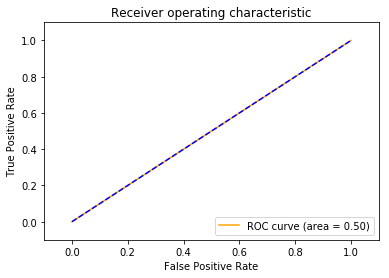

True negative 0
False positive 40
False negative 0
True positive 0


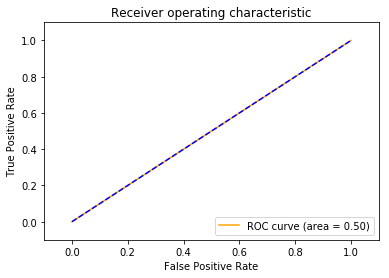

Average accuracy, precision, recall, F-score, and AUC, for training sets over your M runs: 
 {'acc_train': 0.6304761904761906, 'prec_train': 0.6304761904761906, 'rec_train': 1.0, 'f1_train': 0.7733244382494763, 'auc_train': 0.5}
Average accuracy, precision, recall, F-score, and AUC, for test sets over your M runs: 
 {'acc_test': 0.6152046783625731, 'prec_test': 0.6152046783625731, 'rec_test': 1.0, 'f1_test': 0.7611188142694056, 'auc_test': 0.5}


In [51]:
M=30
penalties = list(10**exp for exp in range(-3,6))
acc_train=[]
prec_train=[]
rec_train=[]
f1_train=[]
auc_train=[]

acc_test=[]
prec_test=[]
rec_test=[]
f1_test=[]
auc_test=[]

for i in range(0,M):
    print(i+1,"th experiments results are:")
    trainx=data.drop([1],axis=1)
    trainx_std=(trainx-trainx.min())/(trainx.max()-trainx.min())
    trainx_std,testx,trainy,testy=train_test_split(trainx_std,data.loc[:,[1]],test_size=0.2)
    
    curr_scores={}
    for curr_C in penalties:
        curr_model=svm.LinearSVC(C=curr_C,penalty='l1',dual=False,tol=0.0001)
        score=cross_val_score(curr_model,trainx_std,y=trainy,cv=5)
        curr_scores[curr_C]=np.mean(score)
    opt_c=min(curr_scores,key=curr_scores.get)
    model=svm.LinearSVC(C=opt_c,penalty='l1',dual=False,tol=0.0001)
    model = CalibratedClassifierCV(model)
    model.fit(trainx_std,trainy)
    
    trainy_pred=model.predict(trainx_std)
    trainy_prob=model.predict_proba(trainx_std)
    curr_accuracy_train=accuracy_score(trainy,trainy_pred)
    curr_precision_train=precision_score(trainy,trainy_pred)
    curr_recall_train=recall_score(trainy,trainy_pred)
    curr_f1_train=f1_score(trainy,trainy_pred)
    curr_auc_train=roc_auc_score(trainy,trainy_pred)
    print("Accuracy Train:",curr_accuracy_train,"Precision Train:",curr_precision_train,"Recall Train:",curr_recall_train,"F-1 Score Train:",curr_f1_train,"AUC Train:",auc_train)
    
    testy_pred=model.predict(testx)
    testy_prob=model.predict_proba(testx)
    curr_accuracy_test=accuracy_score(testy,testy_pred)
    curr_precision_test=precision_score(testy,testy_pred)
    curr_recall_test=recall_score(testy,testy_pred)
    curr_f1_test=f1_score(testy,testy_pred)
    curr_auc_test=roc_auc_score(testy,testy_pred)
    print("Accuracy Test:",curr_accuracy_test,"Precision Test:",curr_precision_test,"Recall Test:",curr_recall_test,"F-1 Score Test:",curr_f1_test,"AUC Test:",auc_test)
    print("")
    acc_train.append(curr_accuracy_train)
    prec_train.append(curr_precision_train)
    rec_train.append(curr_recall_train)
    f1_train.append(curr_f1_train)
    auc_train.append(curr_auc_train)
    
    acc_test.append(curr_accuracy_test)
    prec_test.append(curr_precision_test)
    rec_test.append(curr_recall_test)
    f1_test.append(curr_f1_test)
    auc_test.append(curr_auc_test)
    
    if i==M-1:
        
        print_conf_mat(trainy,trainy_pred)
        build_roc(trainy,trainy_prob[:,0])
        print_conf_mat(testy,testy_pred)
        build_roc(testy,testy_prob[:,0])
train_vals1={}
test_vals1={}
calc_avg(train_vals1,test_vals1)

ii.Semi-Supervised Learning/ Self-training:select 50% of the positiveclass along with 50% of the negative class in the training set aslabeled dataand the rest asunlabelled data. You can select them randomly.A.Train anL1-penalized SVM to classify the labeled data Use normalizeddata. Choose the penalty parameter using 5 fold cross validation.B.Find the unlabeled data point that is the farthest to the decision boundaryof the SVM. Let the SVM label it (ignore its true label), and add it tothe labeled data, and retrain the SVM. Continue this process until allunlabeled data are used. Test the final SVM on the test data andtheaverage accuracy, precision, recall, F-score, and AUC, for both trainingand test sets over yourMruns. Plot the ROC and report the confusionmatrix for training and testing in one of the runs.

In [1]:
M=30
penalties = list(10**exp for exp in range(-3,6))
acc_train=[]
prec_train=[]
rec_train=[]
f1_train=[]
auc_train=[]

acc_test=[]
prec_test=[]
rec_test=[]
f1_test=[]
auc_test=[]

for i in range(0,M):
    print(i,"th experiments results are:")
    trainx=data.drop([1],axis=1)
    trainx_std=(trainx-trainx.min())/(trainx.max()-trainx.min())
    trainx_std,testx,trainy,testy=train_test_split(trainx_std,data.loc[:,[1]],test_size=0.2)
    
    newtrainx=trainx_std.copy()
    newtrainx["class"]=trainy
    newtrainx_1s=newtrainx[newtrainx["class"]==1]
    newtrainx_0s=newtrainx[newtrainx["class"]==0]

    x1_train, x1_test, y1_train, y1_test = train_test_split(newtrainx_1s.drop(['class'], axis=1), newtrainx_1s['class'], test_size = 0.5,random_state=None)
    x0_train, x0_test, y0_train, y0_test = train_test_split(newtrainx_0s.drop(['class'], axis=1), newtrainx_0s['class'], test_size = 0.5,random_state=None)
    x_label = pd.concat([x1_train, x0_train])
    y_label = pd.concat([y1_train, y0_train])
    x_unlabel = pd.concat([x1_test, x0_test])
    y_unlabel = pd.concat([y1_test, y0_test])
    opt_c=0
    for curr_C in penalties:
        curr_model=svm.LinearSVC(C=curr_C,penalty='l1',dual=False,tol=0.0001)
        score=cross_val_score(curr_model,trainx_std,y=trainy,cv=5)
        curr_scores[curr_C]=np.mean(score)
    opt_c=min(curr_scores,key=curr_scores.get)
    print(opt_c)
        
    while not(x_unlabel.empty):
        curr_scores={}
        model=svm.LinearSVC(C=opt_c,penalty='l1',dual=False,tol=0.0001)
        model.fit(x_label,y_label)
        dists=np.absolute(model.decision_function(x_unlabel))
        indexes=x_unlabel.index.tolist()
        pos_dists=dict(zip(indexes,dists))
        index_max=max(pos_dists,key=pos_dists.get)
        x_train=pd.concat([x_label,pd.DataFrame(x_unlabel.loc[index_max,:])])
        y_train=pd.concat([y_label,pd.DataFrame(model.predict([x_unlabel.loc[index_max,:]]))])
        x_unlabel = x_unlabel.drop([index_max])
    print(x_train.shape,"",y_train.shape)  
    model=svm.LinearSVC(C=opt_c,penalty='l1',dual=False,tol=0.0001)
    model = CalibratedClassifierCV(model)
    model.fit(x_train,y_train)
    
    trainy_pred=model.predict(trainx_std)
    trainy_prob=model.predict_proba(trainx_std)
    curr_accuracy_train=accuracy_score(trainy,trainy_pred)
    curr_precision_train=precision_score(trainy,trainy_pred)
    curr_recall_train=recall_score(trainy,trainy_pred)
    curr_f1_train=f1_score(trainy,trainy_pred)
    curr_auc_train=roc_auc_score(trainy,trainy_pred)
    print("Accuracy Train:",curr_accuracy_train,"Precision Train:",curr_precision_train,"Recall Train:",curr_recall_train,"F-1 Score Train:",curr_f1_train,"AUC Train:",auc_train)
    
    testy_pred=model.predict(testx)
    testy_prob=model.predict_proba(testx)
    curr_accuracy_test=accuracy_score(testy,testy_pred)
    curr_precision_test=precision_score(testy,testy_pred)
    curr_recall_test=recall_score(testy,testy_pred)
    curr_f1_test=f1_score(testy,testy_pred)
    curr_auc_test=roc_auc_score(testy,testy_pred)
    print("Accuracy Test:",curr_accuracy_test,"Precision Test:",curr_precision_test,"Recall Test:",curr_recall_test,"F-1 Score Test:",curr_f1_test,"AUC Test:",auc_test)
    print("")
    acc_train.append(curr_accuracy_train)
    prec_train.append(curr_precision_train)
    rec_train.append(curr_recall_train)
    f1_train.append(curr_f1_train)
    auc_train.append(curr_auc_train)
    
    acc_test.append(curr_accuracy_test)
    prec_test.append(curr_precision_test)
    rec_test.append(curr_recall_test)
    f1_test.append(curr_f1_test)
    auc_test.append(curr_auc_test)
    
    if i==M-1:
        
        print_conf_mat(trainy,trainy_pred)
        build_roc(trainy,trainy_prob[:,0])
        print_conf_mat(testy,testy_pred)
        build_roc(testy,testy_prob[:,0])
train_vals2={}
test_vals2={}
calc_avg(train_vals2,test_vals2)

iii.Unsupervised Learning:Run k-means algorithm on the whole trainingset. Ignore the labels of the data, and assumek= 2.A.Run the k-means algorithm multiple times. Make sure that you initializethe algoritm randomly. How do you make sure that the algorithm wasnot trapped in a local minimum?

To minimize the possibility of getting the local minimum, we would like to run K-Means several times to get the best model. And it has been realized in KMeans library in sklearn.


B.Compute the centers of the two clusters and find the closest 30 datapoints to each center. Read the true labels of those 30 data points andtake a majority poll within them. The majority poll becomes the labelpredicted by k-means for the members of each cluster. Then compare thelabels provided by k-means with the true labels of the training data andreport the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

C.Classify test data based on their proximity to the centers of the clusters.Report the average accuracy, precision, recall, F-score, and AUC overMruns, and ROC and the confusion matrix for one of the runs for the testdata.

1 th experiments results are:
Accuracy Train: 0.016666666666666666 Precision Train: 0.0 Recall Train: 0.0 F-1 Score Train: 0.0 AUC Train: []
Accuracy Test: 0.8245614035087719 Precision Test: 0.7894736842105263 Recall Test: 1.0 F-1 Score Test: 0.8823529411764706 AUC Test: []

2 th experiments results are:
Accuracy Train: 1.0 Precision Train: 1.0 Recall Train: 1.0 F-1 Score Train: 1.0 AUC Train: [0.016129032258064502]
Accuracy Test: 0.21929824561403508 Precision Test: 0.0 Recall Test: 0.0 F-1 Score Test: 0.0 AUC Test: [0.7435897435897436]

3 th experiments results are:
Accuracy Train: 0.9833333333333333 Precision Train: 0.9666666666666667 Recall Train: 1.0 F-1 Score Train: 0.983050847457627 AUC Train: [0.016129032258064502, 1.0]
Accuracy Test: 0.868421052631579 Precision Test: 0.8351648351648352 Recall Test: 1.0 F-1 Score Test: 0.9101796407185628 AUC Test: [0.7435897435897436, 0.20833333333333331]

4 th experiments results are:
Accuracy Train: 0.9833333333333333 Precision Train: 0.966666

Accuracy Train: 0.016666666666666666 Precision Train: 0.0 Recall Train: 0.0 F-1 Score Train: 0.0 AUC Train: [0.016129032258064502, 1.0, 0.9838709677419355, 0.9838709677419355, 0.9838709677419355, 0.016129032258064502, 0.016129032258064502, 0.0, 1.0, 1.0, 0.9838709677419355, 0.016129032258064502, 0.0, 0.0, 1.0, 1.0, 0.9838709677419355]
Accuracy Test: 0.18421052631578946 Precision Test: 0.038461538461538464 Recall Test: 0.014492753623188406 F-1 Score Test: 0.021052631578947368 AUC Test: [0.7435897435897436, 0.20833333333333331, 0.8026315789473684, 0.2, 0.9, 0.16129032258064518, 0.8557432432432432, 0.7916666666666666, 0.1595744680851064, 0.79, 0.8142857142857143, 0.1595744680851064, 0.7765957446808511, 0.1282051282051282, 0.24, 0.20930232558139533, 0.784090909090909]

19 th experiments results are:
Accuracy Train: 0.016666666666666666 Precision Train: 0.0 Recall Train: 0.0 F-1 Score Train: 0.0 AUC Train: [0.016129032258064502, 1.0, 0.9838709677419355, 0.9838709677419355, 0.983870967741935

Accuracy Train: 0.9833333333333333 Precision Train: 0.9666666666666667 Recall Train: 1.0 F-1 Score Train: 0.983050847457627 AUC Train: [0.016129032258064502, 1.0, 0.9838709677419355, 0.9838709677419355, 0.9838709677419355, 0.016129032258064502, 0.016129032258064502, 0.0, 1.0, 1.0, 0.9838709677419355, 0.016129032258064502, 0.0, 0.0, 1.0, 1.0, 0.9838709677419355, 0.016129032258064502, 0.016129032258064502, 1.0, 0.016129032258064502, 0.9838709677419355, 0.9838709677419355, 0.016129032258064502, 0.0, 1.0]
Accuracy Test: 0.14912280701754385 Precision Test: 0.038461538461538464 Recall Test: 0.0136986301369863 F-1 Score Test: 0.0202020202020202 AUC Test: [0.7435897435897436, 0.20833333333333331, 0.8026315789473684, 0.2, 0.9, 0.16129032258064518, 0.8557432432432432, 0.7916666666666666, 0.1595744680851064, 0.79, 0.8142857142857143, 0.1595744680851064, 0.7765957446808511, 0.1282051282051282, 0.24, 0.20930232558139533, 0.784090909090909, 0.22946859903381642, 0.175, 0.7584947602413464, 0.200324675

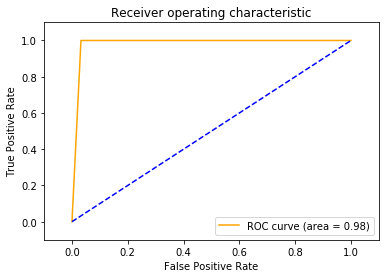

True negative 25
False positive 17
False negative 25
True positive 25


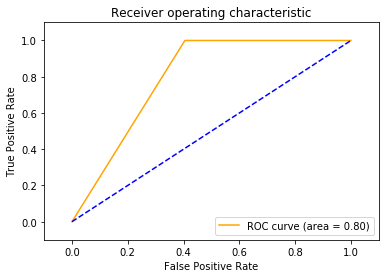

Average accuracy, precision, recall, F-score, and AUC, for training sets over your M runs: 
 {'acc_train': 0.5655555555555555, 'prec_train': 0.5555555555555556, 'rec_train': 0.5666666666666667, 'f1_train': 0.5610169491525423, 'auc_train': 0.5655913978494624}
Average accuracy, precision, recall, F-score, and AUC, for test sets over your M runs: 
 {'acc_test': 0.47397660818713455, 'prec_test': 0.38195790269642493, 'rec_test': 0.46660998706992685, 'f1_test': 0.4187060141203118, 'auc_test': 0.47413538662145005}


In [117]:
M=30
penalties = list(10**exp for exp in range(-3,6))
acc_train=[]
prec_train=[]
rec_train=[]
f1_train=[]
auc_train=[]

acc_test=[]
prec_test=[]
rec_test=[]
f1_test=[]
auc_test=[]

for i in range(0,M):
    print(i+1,"th experiments results are:")
    trainx=data.drop([1],axis=1)
#     trainx_std=(trainx-trainx.min())/(trainx.max()-trainx.min())
    trainx,testx,trainy,testy=train_test_split(trainx,data.loc[:,[1]],test_size=0.2)
    model=KMeans(n_clusters=2,n_init=100,init="random").fit(trainx)
    trainy_indices=trainy.index.tolist()
    y_pred=pd.DataFrame(model.labels_,index=trainy.index)
    dist_train=model.fit_transform(trainx)
    class_0_train=dict(zip(trainy_indices,dist_train[:,0]))
    class_0_indices=heapq.nsmallest(30,class_0_train,key=class_0_train.get)
    clust_0=y_pred.loc[class_0_indices][0].value_counts().index[0]
    trainy_list1=trainy.loc[class_0_indices]
    trainy_list2=pd.DataFrame([clust_0]*30,index=trainy_list1)
    class_1_train=dict(zip(trainy_indices,dist_train[:,1]))
    class_1_indices=heapq.nsmallest(30,class_1_train,key=class_1_train.get)
    clust_1=y_pred.loc[class_1_indices][0].value_counts().index[0]
    trainy_list3=trainy.loc[class_1_indices]
    trainy_list4=pd.DataFrame([clust_1]*30,index=trainy_list3)
    trainy_list5=pd.concat([trainy_list1,trainy_list3])
    trainy_list6=pd.concat([trainy_list2,trainy_list4])

    curr_accuracy_train=accuracy_score(trainy_list5,trainy_list6)
    curr_precision_train=precision_score(trainy_list5,trainy_list6)
    curr_recall_train=recall_score(trainy_list5,trainy_list6)
    curr_f1_train=f1_score(trainy_list5,trainy_list6)
    curr_auc_train=roc_auc_score(trainy_list5,trainy_list6)
    print("Accuracy Train:",curr_accuracy_train,"Precision Train:",curr_precision_train,"Recall Train:",curr_recall_train,"F-1 Score Train:",curr_f1_train,"AUC Train:",auc_train)
    
    testy_pred=model.predict(testx)
#     testy_prob=model.predict_proba(testx)
    curr_accuracy_test=accuracy_score(testy,testy_pred)
    curr_precision_test=precision_score(testy,testy_pred)
    curr_recall_test=recall_score(testy,testy_pred)
    curr_f1_test=f1_score(testy,testy_pred)
    curr_auc_test=roc_auc_score(testy,testy_pred)
    print("Accuracy Test:",curr_accuracy_test,"Precision Test:",curr_precision_test,"Recall Test:",curr_recall_test,"F-1 Score Test:",curr_f1_test,"AUC Test:",auc_test)
    print("")
    acc_train.append(curr_accuracy_train)
    prec_train.append(curr_precision_train)
    rec_train.append(curr_recall_train)
    f1_train.append(curr_f1_train)
    auc_train.append(curr_auc_train)
    
    acc_test.append(curr_accuracy_test)
    prec_test.append(curr_precision_test)
    rec_test.append(curr_recall_test)
    f1_test.append(curr_f1_test)
    auc_test.append(curr_auc_test)
    
    if i==M-1:
        
        print_conf_mat(trainy_list5,trainy_list6)
        build_roc(trainy_list5,trainy_list6)
        print_conf_mat(testy,testy_pred)
        build_roc(testy,testy_pred)
train_vals3={}
test_vals3={}
calc_avg(train_vals3,test_vals3)

iv.Spectral Clustering: Repeat 1(b)iii usingspectral clustering, which is clus-tering based on kernels. Research what spectral clustering is. Use RBF kernelwith gamma=1 or find a gamma for which the two clutsres have the samebalance as the one in original data set (if the positive class haspand thenegative class hasnsamples, the two clusters must havepandnmembers).Do not label data based on their proximity to cluster center, because spectralclustering may give you non-convex clusters . Instead, usefit−predictmethod

1 th experiments results are:
Accuracy Train: 0.5 Precision Train: 0.0 Recall Train: 0.0 F-1 Score Train: 0.0 AUC Train: []
Accuracy Test: 0.35964912280701755 Precision Test: 0.0 Recall Test: 0.0 F-1 Score Test: 0.0 AUC Test: []

2 th experiments results are:
Accuracy Train: 0.5 Precision Train: 0.0 Recall Train: 0.0 F-1 Score Train: 0.0 AUC Train: [0.5]
Accuracy Test: 0.3333333333333333 Precision Test: 0.0 Recall Test: 0.0 F-1 Score Test: 0.0 AUC Test: [0.5]

3 th experiments results are:
Accuracy Train: 0.5 Precision Train: 0.0 Recall Train: 0.0 F-1 Score Train: 0.0 AUC Train: [0.5, 0.5]
Accuracy Test: 0.49122807017543857 Precision Test: 0.0 Recall Test: 0.0 F-1 Score Test: 0.0 AUC Test: [0.5, 0.5]

4 th experiments results are:
Accuracy Train: 0.5 Precision Train: 0.0 Recall Train: 0.0 F-1 Score Train: 0.0 AUC Train: [0.5, 0.5, 0.5]
Accuracy Test: 0.38596491228070173 Precision Test: 0.0 Recall Test: 0.0 F-1 Score Test: 0.0 AUC Test: [0.5, 0.5, 0.49122807017543857]

5 th experiments 

Accuracy Train: 0.5166666666666667 Precision Train: 0.0 Recall Train: 0.0 F-1 Score Train: 0.0 AUC Train: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Accuracy Test: 0.3684210526315789 Precision Test: 0.0 Recall Test: 0.0 F-1 Score Test: 0.0 AUC Test: [0.5, 0.5, 0.49122807017543857, 0.5, 0.5, 0.5, 0.5, 0.4888888888888889, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4868421052631579, 0.5, 0.5, 0.5, 0.5]

25 th experiments results are:
Accuracy Train: 0.5 Precision Train: 0.0 Recall Train: 0.0 F-1 Score Train: 0.0 AUC Train: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Accuracy Test: 0.3157894736842105 Precision Test: 0.0 Recall Test: 0.0 F-1 Score Test: 0.0 AUC Test: [0.5, 0.5, 0.49122807017543857, 0.5, 0.5, 0.5, 0.5, 0.4888888888888889, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4868421052631579, 0.5, 0.5, 0.5, 0.5, 0.5]

26

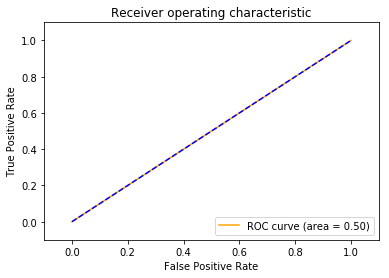

True negative 37
False positive 0
False negative 37
True positive 37


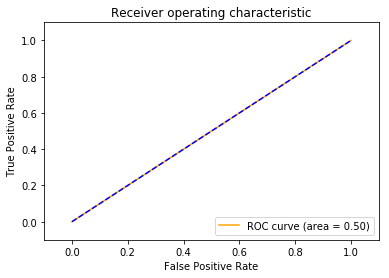

Average accuracy, precision, recall, F-score, and AUC, for training sets over your M runs: 
 {'acc_train': 0.5083333333333334, 'prec_train': 0.0, 'rec_train': 0.0, 'f1_train': 0.0, 'auc_train': 0.5}
Average accuracy, precision, recall, F-score, and AUC, for test sets over your M runs: 
 {'acc_test': 0.36637426900584796, 'prec_test': 0.0, 'rec_test': 0.0, 'f1_test': 0.0, 'auc_test': 0.4981213876415115}


In [128]:
M=30
# penalties = np.linspace(0.00001,1,10)
acc_train=[]
prec_train=[]
rec_train=[]
f1_train=[]
auc_train=[]

acc_test=[]
prec_test=[]
rec_test=[]
f1_test=[]
auc_test=[]

for i in range(0,M):
    print(i+1,"th experiments results are:")
    trainx=data.drop([1],axis=1)
#     trainx_std=(trainx-trainx.min())/(trainx.max()-trainx.min())
    trainx,testx,trainy,testy=train_test_split(trainx,data.loc[:,[1]],test_size=0.2)
    spec=SpectralEmbedding(n_components=2,affinity="rbf")
    trainx_transformed=spec.fit_transform(trainx)
    testx_transformed=spec.fit_transform(testx)
    model=KMeans(n_clusters=2,n_init=10).fit(trainx_transformed)
    testy_pred=model.predict(testx_transformed)
    
    trainy_indices=trainy.index.tolist()
    y_pred=pd.DataFrame(model.labels_,index=trainy.index)
    dist_train=model.fit_transform(trainx)
    class_0_train=dict(zip(trainy_indices,dist_train[:,0]))
    class_0_indices=heapq.nsmallest(30,class_0_train,key=class_0_train.get)
    clust_0=y_pred.loc[class_0_indices][0].value_counts().index[0]
    trainy_list1=trainy.loc[class_0_indices]
    trainy_list2=pd.DataFrame([clust_0]*30,index=trainy_list1)
    class_1_train=dict(zip(trainy_indices,dist_train[:,1]))
    class_1_indices=heapq.nsmallest(30,class_1_train,key=class_1_train.get)
    clust_1=y_pred.loc[class_1_indices][0].value_counts().index[0]
    trainy_list3=trainy.loc[class_1_indices]
    trainy_list4=pd.DataFrame([clust_1]*30,index=trainy_list3)
    trainy_list5=pd.concat([trainy_list1,trainy_list3])
    trainy_list6=pd.concat([trainy_list2,trainy_list4])

    curr_accuracy_train=accuracy_score(trainy_list5,trainy_list6)
    curr_precision_train=precision_score(trainy_list5,trainy_list6)
    curr_recall_train=recall_score(trainy_list5,trainy_list6)
    curr_f1_train=f1_score(trainy_list5,trainy_list6)
    curr_auc_train=roc_auc_score(trainy_list5,trainy_list6)
    print("Accuracy Train:",curr_accuracy_train,"Precision Train:",curr_precision_train,"Recall Train:",curr_recall_train,"F-1 Score Train:",curr_f1_train,"AUC Train:",auc_train)
    
    

    curr_accuracy_test=accuracy_score(testy,testy_pred)
    curr_precision_test=precision_score(testy,testy_pred)
    curr_recall_test=recall_score(testy,testy_pred)
    curr_f1_test=f1_score(testy,testy_pred)
    curr_auc_test=roc_auc_score(testy,testy_pred)
    print("Accuracy Test:",curr_accuracy_test,"Precision Test:",curr_precision_test,"Recall Test:",curr_recall_test,"F-1 Score Test:",curr_f1_test,"AUC Test:",auc_test)
    print("")
    acc_train.append(curr_accuracy_train)
    prec_train.append(curr_precision_train)
    rec_train.append(curr_recall_train)
    f1_train.append(curr_f1_train)
    auc_train.append(curr_auc_train)
    
    acc_test.append(curr_accuracy_test)
    prec_test.append(curr_precision_test)
    rec_test.append(curr_recall_test)
    f1_test.append(curr_f1_test)
    auc_test.append(curr_auc_test)
    
    if i==M-1:
        
        print_conf_mat(trainy_list5,trainy_list6)
        build_roc(trainy_list5,trainy_list6)
        print_conf_mat(testy,testy_pred)
        build_roc(testy,testy_pred)
train_vals4={}
test_vals4={}
calc_avg(train_vals4,test_vals4)

v.One can expect that supervised learning on the full data set works better thansemi-supervised learning with half of the data set labeled.One can expect thatunsupervised learning underperforms in such situations. Compare the resultsyou obtained by those methods.

In [9]:
metrics = pd.concat([sl_metrics, semi_metrics, unsl_metrics, spec_metrics])
metrics

,AUC,Accuracy,F1,Precision,Recall
sl_training,0.500000,0.629670,0.772714,0.629670,1.000000
sl_test,0.500000,0.618421,0.763490,0.618421,1.000000
semi_training,0.113282,0.723590,0.660482,0.791686,0.568843
semi_test,0.438900,0.401754,0.025948,0.021242,0.033333
unsl_training,0.629570,0.629444,0.624859,0.616667,0.633333
unsl_test,0.546581,0.549123,0.511447,0.468499,0.566640
spec_training,0.500000,0.508889,0.000000,0.000000,0.000000
spec_test,0.495649,0.381871,0.001026,0.016667,0.000529


In [ ]:
spec_metrics = pd.DataFrame([train_metrics,test_metrics],index=["spec_training","spec_test"])
pd.concat([])

From above four models, we can find that supervised learning perform best among four.The semi supervised learning tend to overfit the model sometimes and might be variant at each simulation, so the peformance of model for test dataset is not as good as that for training dataset. The unsupervised learning is unstable in each simulation, and the result varies in a large range due to the disadvantage of k-means, which might cause local optimization. So the model might underperform in such situations.

In [12]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statistics
import heapq

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm
from sklearn.metrics import hamming_loss
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from scipy.spatial import distance

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score, roc_curve,auc
from sklearn.calibration import CalibratedClassifierCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

2.Active Learning Using Support Vector Machines(a)Download the banknote authentication Data Set from:https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points ran-domly as the test set, and the remaining 900 points as the training set. This is abinary classification problem

In [13]:
itr=50
data2=pd.read_csv("C:\\Users\\D\\Downloads\\data_banknote_authentication.txt",header=None)
# data2

In [14]:
xdata=data2.drop([4],axis=1)
ydata=data2.loc[:,[4]]
xdata=(xdata-xdata.min())/(xdata.max()-xdata.min())
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=472)
datacounts = np.arange(10,901,10)
passive_sts = pd.DataFrame(columns=datacounts.tolist())
# lab_enc = preprocessing.LabelEncoder()
# training_scores_encoded = lab_enc.fit_transform(ytrain)

(b)Repeat each of the following two procedures 50 times. You will have 50 errors for90 SVMs per each procedure.i.Train a SVM with a pool of 10 randomly selected data points from the trainingset using linear kernel andL1penalty. Select the penalty parameter using10-fold cross validation.2Repeat this process by adding 10 other randomlyselected data points to the pool, until you use all the 900 points. Do NOTreplace the samples back into the training set at each step. Calculate thetest error for each SVM. You will have 90 SVMs that were trained using 10,20, 30, ... , 900 data points and their 90 test errors. You have implementedpassive learning

In [15]:
for i in range(0,itr):
    print(i+1,"th experiment")
    test_err=[]
    xused,xnotused,yused,ynotused=train_test_split(xtrain,ytrain,train_size=10,stratify=ytrain)
    model=svm.LinearSVC(penalty='l1',dual=False,tol=0.0001)
    params={'C':penalties}
    model=GridSearchCV(model,params,cv=5)
    model.fit(xused,yused)
    model=model.best_estimator_
    error=1-model.score(xtest,ytest)
    test_err.append(error)
    
    while xnotused.size>50:
        xsel,xnotused,ysel,ynotused=train_test_split(xnotused,ynotused,train_size=10,stratify=ynotused)
        xused=xused.append(xsel,ignore_index=True)
        yused=yused.append(ysel,ignore_index=True)
        model=svm.LinearSVC(penalty='l1',dual=False,tol=0.0001)
        params={'C':penalties}
        model=GridSearchCV(model,params,cv=5)
        model.fit(xused,yused)
        model=model.best_estimator_
        error=1-model.score(xtest,ytest)
        test_err.append(error)
    xused=xused.append(xsel,ignore_index=True)
    yused=yused.append(ysel,ignore_index=True)
    model=svm.LinearSVC(penalty='l1',dual=False,tol=0.0001)
    params={'C':penalties}
    model=GridSearchCV(model,params,cv=5)
    model.fit(xused,yused)
    model=model.best_estimator_
    error=1-model.score(xtest,ytest)
    test_err.append(error)
    passive_sts.loc[itr]=test_err
    print(test_err)
print("AVG MSE:",pd.DataFrame(passive_sts.mean()).T)
        
    

1 th experiment
[0.2097457627118644, 0.15042372881355937, 0.0402542372881356, 0.03813559322033899, 0.044491525423728806, 0.025423728813559365, 0.016949152542372836, 0.01906779661016944, 0.029661016949152574, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.01906779661016944, 0.014830508474576232, 0.012711864406779627, 0.01906779661016944, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.

[0.15677966101694918, 0.15466101694915257, 0.10805084745762716, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.010593220338983023, 0.010593220338983023, 0.008474576271186418, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.0084745762

[0.0402542372881356, 0.014830508474576232, 0.01906779661016944, 0.021186440677966156, 0.014830508474576232, 0.02330508474576276, 0.014830508474576232, 0.01906779661016944, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271

[0.15466101694915257, 0.016949152542372836, 0.014830508474576232, 0.012711864406779627, 0.016949152542372836, 0.008474576271186418, 0.016949152542372836, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.010593220338983023, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.012711864406779627, 0.016949152542372836, 0.016949152542372836, 0.014830508474576232, 0.014830508474576232, 0.012711864406779627, 0.01271186

[0.27330508474576276, 0.1652542372881356, 0.025423728813559365, 0.1313559322033898, 0.029661016949152574, 0.029661016949152574, 0.03177966101694918, 0.02754237288135597, 0.012711864406779627, 0.012711864406779627, 0.021186440677966156, 0.012711864406779627, 0.016949152542372836, 0.021186440677966156, 0.012711864406779627, 0.008474576271186418, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.010593220338983023, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.00847457627118

[0.2584745762711864, 0.021186440677966156, 0.021186440677966156, 0.03813559322033899, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.03177966101694918, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.03601694915254239, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.029661016949152574, 0.010593220338983023, 0.008474576271186418, 0.010593220338983023, 0.016949152542372836, 0.025423728813559365, 0.02330508474576276, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.014830508474576232, 0.010593220338983023, 0.012711864406779627, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.01059322033898302

[0.02330508474576276, 0.016949152542372836, 0.016949152542372836, 0.014830508474576232, 0.014830508474576232, 0.01906779661016944, 0.025423728813559365, 0.02330508474576276, 0.02330508474576276, 0.021186440677966156, 0.010593220338983023, 0.006355932203389814, 0.006355932203389814, 0.006355932203389814, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.016949152542372836, 0.008474576271186418, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.012711864406779627, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.014830508474576232, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.01271186440

[0.06355932203389836, 0.02754237288135597, 0.029661016949152574, 0.016949152542372836, 0.025423728813559365, 0.025423728813559365, 0.021186440677966156, 0.021186440677966156, 0.01906779661016944, 0.016949152542372836, 0.014830508474576232, 0.014830508474576232, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.010593220338983023, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.008474576271186418, 0.008474576271186418, 0.016949152542372836, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418,

[0.1292372881355932, 0.03177966101694918, 0.029661016949152574, 0.01906779661016944, 0.025423728813559365, 0.021186440677966156, 0.016949152542372836, 0.014830508474576232, 0.016949152542372836, 0.014830508474576232, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.008474576271186418, 0.01906779661016944, 0.004237288135593209, 0.016949152542372836, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.010593220338983023, 0.010593220338983023, 0.008474576271186418, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338

[0.31355932203389836, 0.11864406779661019, 0.13771186440677963, 0.13347457627118642, 0.07203389830508478, 0.012711864406779627, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.010593220338983023, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.016949152542372836, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.012711864406779627, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406

ii.Train a SVM with a pool of 10 randomly selected data points from the trainingset3using linear kernel andL1penalty. Select the parameters of the SVMwith 10-fold cross validation. Choose the 10 closest data points in the trainingset to the hyperplane of the SVM4and add them to the pool. Do not replacethe samples back into the training set. Train a new SVM using the pool.Repeat this process until all training data is used. You will have 90 SVMsthat were trained using 10, 20, 30,..., 900 data points and their 90 test errors.You have implementedactive learning.

In [16]:
datacounts = np.arange(10,901,10)
ac_sts = pd.DataFrame(columns=datacounts.tolist())

In [17]:
for i in range(0,itr):
    print(i+1,"th experiment")
    test_err=[]
    xused,xnotused,yused,ynotused=train_test_split(xtrain,ytrain,train_size=10,stratify=ytrain)
    model=svm.LinearSVC(penalty='l1',dual=False,tol=0.0001)
    params={'C':penalties}
    model=GridSearchCV(model,params,cv=5)
    model.fit(xused,yused)
    model=model.best_estimator_
    error=1-model.score(xtest,ytest)
    test_err.append(error)
    
    while not(xnotused.empty):
        dists=np.absolute(model.decision_function(xnotused))
        indices=xnotused.index.tolist()
        pos_dists=dict(zip(indices,dists))
        top_indices=heapq.nsmallest(10,pos_dists,key=pos_dists.get)
        rel_x=xnotused.loc[top_indices,:]
        rel_y=ynotused.loc[top_indices,:]
        xused=xused.append(rel_x,ignore_index=True)
        yused=yused.append(rel_y,ignore_index=True)
        xnotused=xnotused.drop(top_indices)
        ynotused=ynotused.drop(top_indices)
        model=svm.LinearSVC(penalty='l1',dual=False,tol=0.0001)
        params={'C':penalties}
        model=GridSearchCV(model,params,cv=5)
        model.fit(xused,yused)
        model=model.best_estimator_
        error=1-model.score(xtest,ytest)
        test_err.append(error)
        
    ac_sts.loc[itr]=test_err
    print(test_err)
print("AVG MSE:",pd.DataFrame(passive_sts.mean()).T)
        
    

1 th experiment
[0.14194915254237284, 0.03177966101694918, 0.021186440677966156, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.008474576271186

[0.18008474576271183, 0.03813559322033899, 0.06991525423728817, 0.03389830508474578, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.006355932203389814, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.016949152542372836, 0.00847457627

[0.10805084745762716, 0.016949152542372836, 0.18432203389830504, 0.12076271186440679, 0.06779661016949157, 0.014830508474576232, 0.010593220338983023, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.012711864406779627, 0.016949152542372836, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.01271186440

[0.052966101694915224, 0.1673728813559322, 0.01906779661016944, 0.021186440677966156, 0.014830508474576232, 0.008474576271186418, 0.010593220338983023, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.016949152542372836, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.012711864406779627, 0.008474576271186418, 0.016949152542372836, 0.016949152542372836, 0.008474576271186418, 0.0127118644

[0.15889830508474578, 0.016949152542372836, 0.03177966101694918, 0.012711864406779627, 0.014830508474576232, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.016949152542372836, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.016949152542372836, 0.012711864406779627, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864

[0.2139830508474576, 0.11440677966101698, 0.052966101694915224, 0.0423728813559322, 0.012711864406779627, 0.016949152542372836, 0.006355932203389814, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.012711864406

[0.029661016949152574, 0.23516949152542377, 0.12076271186440679, 0.03813559322033899, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.016949152542372836, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.0084745762

[0.14194915254237284, 0.211864406779661, 0.09110169491525422, 0.03601694915254239, 0.008474576271186418, 0.008474576271186418, 0.021186440677966156, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.012711864406779627, 0.008474576271186418, 0.016949152542372836, 0.008474576271186418, 0.012711864406779627, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.0169491525423

[0.1292372881355932, 0.15889830508474578, 0.1271186440677966, 0.04661016949152541, 0.021186440677966156, 0.014830508474576232, 0.006355932203389814, 0.008474576271186418, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.016949152542372836, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.0084745762711

[0.4110169491525424, 0.15254237288135597, 0.048728813559322015, 0.021186440677966156, 0.03813559322033899, 0.01906779661016944, 0.008474576271186418, 0.010593220338983023, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.014830508474576232, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.008474576271186418, 0.008474576271186418, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.016949152542372836, 0.008474576271186418, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.012711864406779627, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.008474576271

In [ ]:
a=np.zeros((1,90))
for i in range(10,901,10):
    a=i
plt.figure(figsize=(10,8))
plt.plot(a, passive_sts, label='Passive Learning')
plt.plot(a, ac_sts, label='Active Learning')
plt.legend(loc='higher right')
plt.xlabel
('Size of training data')
plt.ylabel
('Test Error')
plt.show()

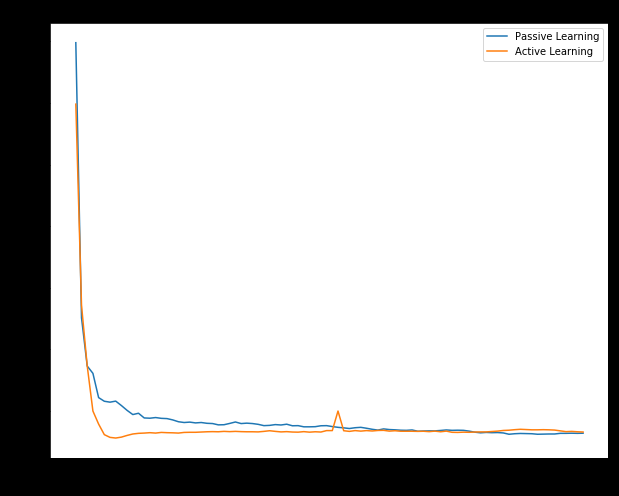